# Neural network notes

Imagine we want to predict our score on a test (y) based on how many hours we slept and how long we studied (x).
Let's set up some training data.

In [6]:
import numpy as np

# x = (hours slept/hours studied)
X = np.array(([3,5], [5,1], [10,2]), dtype=float)

# y = score on test
y = np.array(([75], [82], [93]), dtype=float)

In [7]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [8]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

This is called a __supervised regression__ problem.

* _supervised_: examples have inputs (hours slept/hours studied) and outputs (score)
* _regression_:  we are predicting test score, which is a _continuous_ output

If we were prediciting a letter grade, it would be a __classification__ problem.

Anyway, to solve this problem, we will use an __aritificial neural network__ (ANN).

The first problem we have is that the input is in hours, but the output is a score of 100. To make sure our variables are on the same scale, let's divide each variable by the maximum for each variable.

In [9]:
X = X/np.amax(X, axis=0)
y = y/100 # Max test score is 100

In [11]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [12]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

 What will our network look like? We'll have 2 inputs -- hours of sleep and hours of study, and 1 output -- $\hat{y}$.
 
We call the output $\hat{y}$ because it's an estimate of y, but not the same as y.

The layers inbetween these inputs and outputs are __hidden layers__.

We'll use 1 hidden layer with 3 neurons.

<img src="images/neuralnet.jpg" alt="" style="width: 400px;"/>

In [24]:
# Let's create a neural network class
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        # HyperParameters: Define structure and behaviour of our network
        # but are not updated as we train the network.
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs through the network
        # Sending through all inputs at once in a matrix is more efficient
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        y_hat = self.sigmoid(self.z3)
        return y_hat
    
    def sigmoid(z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))

Now, while we're going to store all of our inputs in a matrix called X.

Then we'll store all of our weights in a matrix called W<sup>(1)</sup>.

Each element in matrix X gets put into the input neurons, multiplied by the weights connected to that neuron and then summed.

<img src="images/fp1.jpg" alt="" style="width: 400px;"/>

-->

<img src="images/fp2.jpg" alt="" style="width: 400px;"/>

Then we can just multiply all of these together to get the values for our neurons in our hidden layer. We'll call that resulting matrix Z<sup>(2)</sup>.

<img src="images/matricesandweights.jpg" alt="" style="width: 400px;"/>

In Z, every entry is a sum of weighted inputs.
Z is 3x3:

* Row = 1 for each example
* Column = 1 for each hidden unit

Anyway, this gives us our first formula:

__Z<sup>(2)</sup> = XW<sup>(1)</sup>__

Now that we have our values for each neuron in the hidden layer, we need to apply our activation function to it.

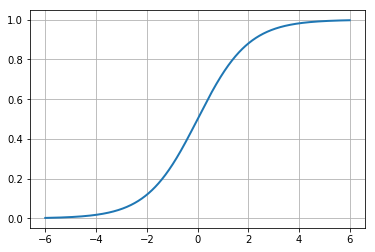

In [21]:
# For our activation function f, we'll use sigmoid
# Reminder: sigmoid will be close to 0 when -ve, and close to 1 when +e
%matplotlib inline
import matplotlib.pyplot as plt


def sigmoid(z):
    # Apply sigmoid activation function
    return 1/(1+np.exp(-z))

test_input = np.arange(-6, 6, 0.01)
plt.plot(test_input, sigmoid(test_input), linewidth=2)
plt.grid(1)

This gives us our second forward propagation formula:

__a<sup>(2)</sup> = f(z<sup>(2)</sup>)__, where f is our sigmoid -- acitivation -- function.

a<sup>(2)</sup> will also be a 3x3 matrix -- it's just our matrix Z run through sigmoid.

Now, to get our output, we need to multiply that value by our second layer weights, W<sub>(2)</sub>.

This gives us our third formula:

__Z<sub>(3)</sub> = a<sub>(2)</sub>W<sub>(2)</sub>__

<img src="images/w2.jpg" alt="" style="width: 400px;"/>


W<sub>(2)</sub> is a 3x1 matrix -- one weight for each synapse.

So applying it will give us another 3x1 matrix.

Finally, we'll just apply our activation function to that Z<sub>(3)</sub> matrix to get our official estimate.

So our last formula is:
__$\hat{y}$ = f(z<sub>(3)</sub>)__